In [105]:
# pandas: high‑performance, easy-to-use data structures (DataFrame) and data analysis tools
import pandas as pd
# NumPy: support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions
import numpy as np
# seaborn: statistical data visualization built on top of matplotlib; provides attractive default styles
import seaborn as sns
# matplotlib.pyplot: core plotting API for creating figures, axes, and a wide range of plot types
from matplotlib import pyplot as plt


In [106]:
# # Import the Colab-specific module that provides access to Google Drive
# from google.colab import drive

# # Mounts your Google Drive at the specified path in the Colab VM filesystem.
# # You’ll be prompted to visit an authorization URL, sign in to your Google account,
# # and paste the resulting auth code here.
# drive.mount('/content/drive')


# Name -- Data Type -- Measurement -- Description

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

8. Age -- quantitative -- Day (1~365) -- Input Variable

9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [107]:
# Read the CSV file from the mounted Drive into a pandas DataFrame.
# The path "/content/Concrete_Data_Yeh.csv" refers to the file in Colab's filesystem
# (e.g. "/content/drive/My Drive/…" if you mounted under Drive).
data = pd.read_csv("concrete.csv")

# Display the first five rows of the DataFrame to verify it loaded correctly
# and to get a quick look at column names and sample values.
data.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [108]:
#to see a quick look of first 10 rows
data.head(100)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
95,475.0,0.0,59.0,142.0,1.9,1098.0,641.0,28,57.23
96,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
97,318.8,212.5,0.0,155.7,14.3,852.1,880.4,7,33.40
98,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40


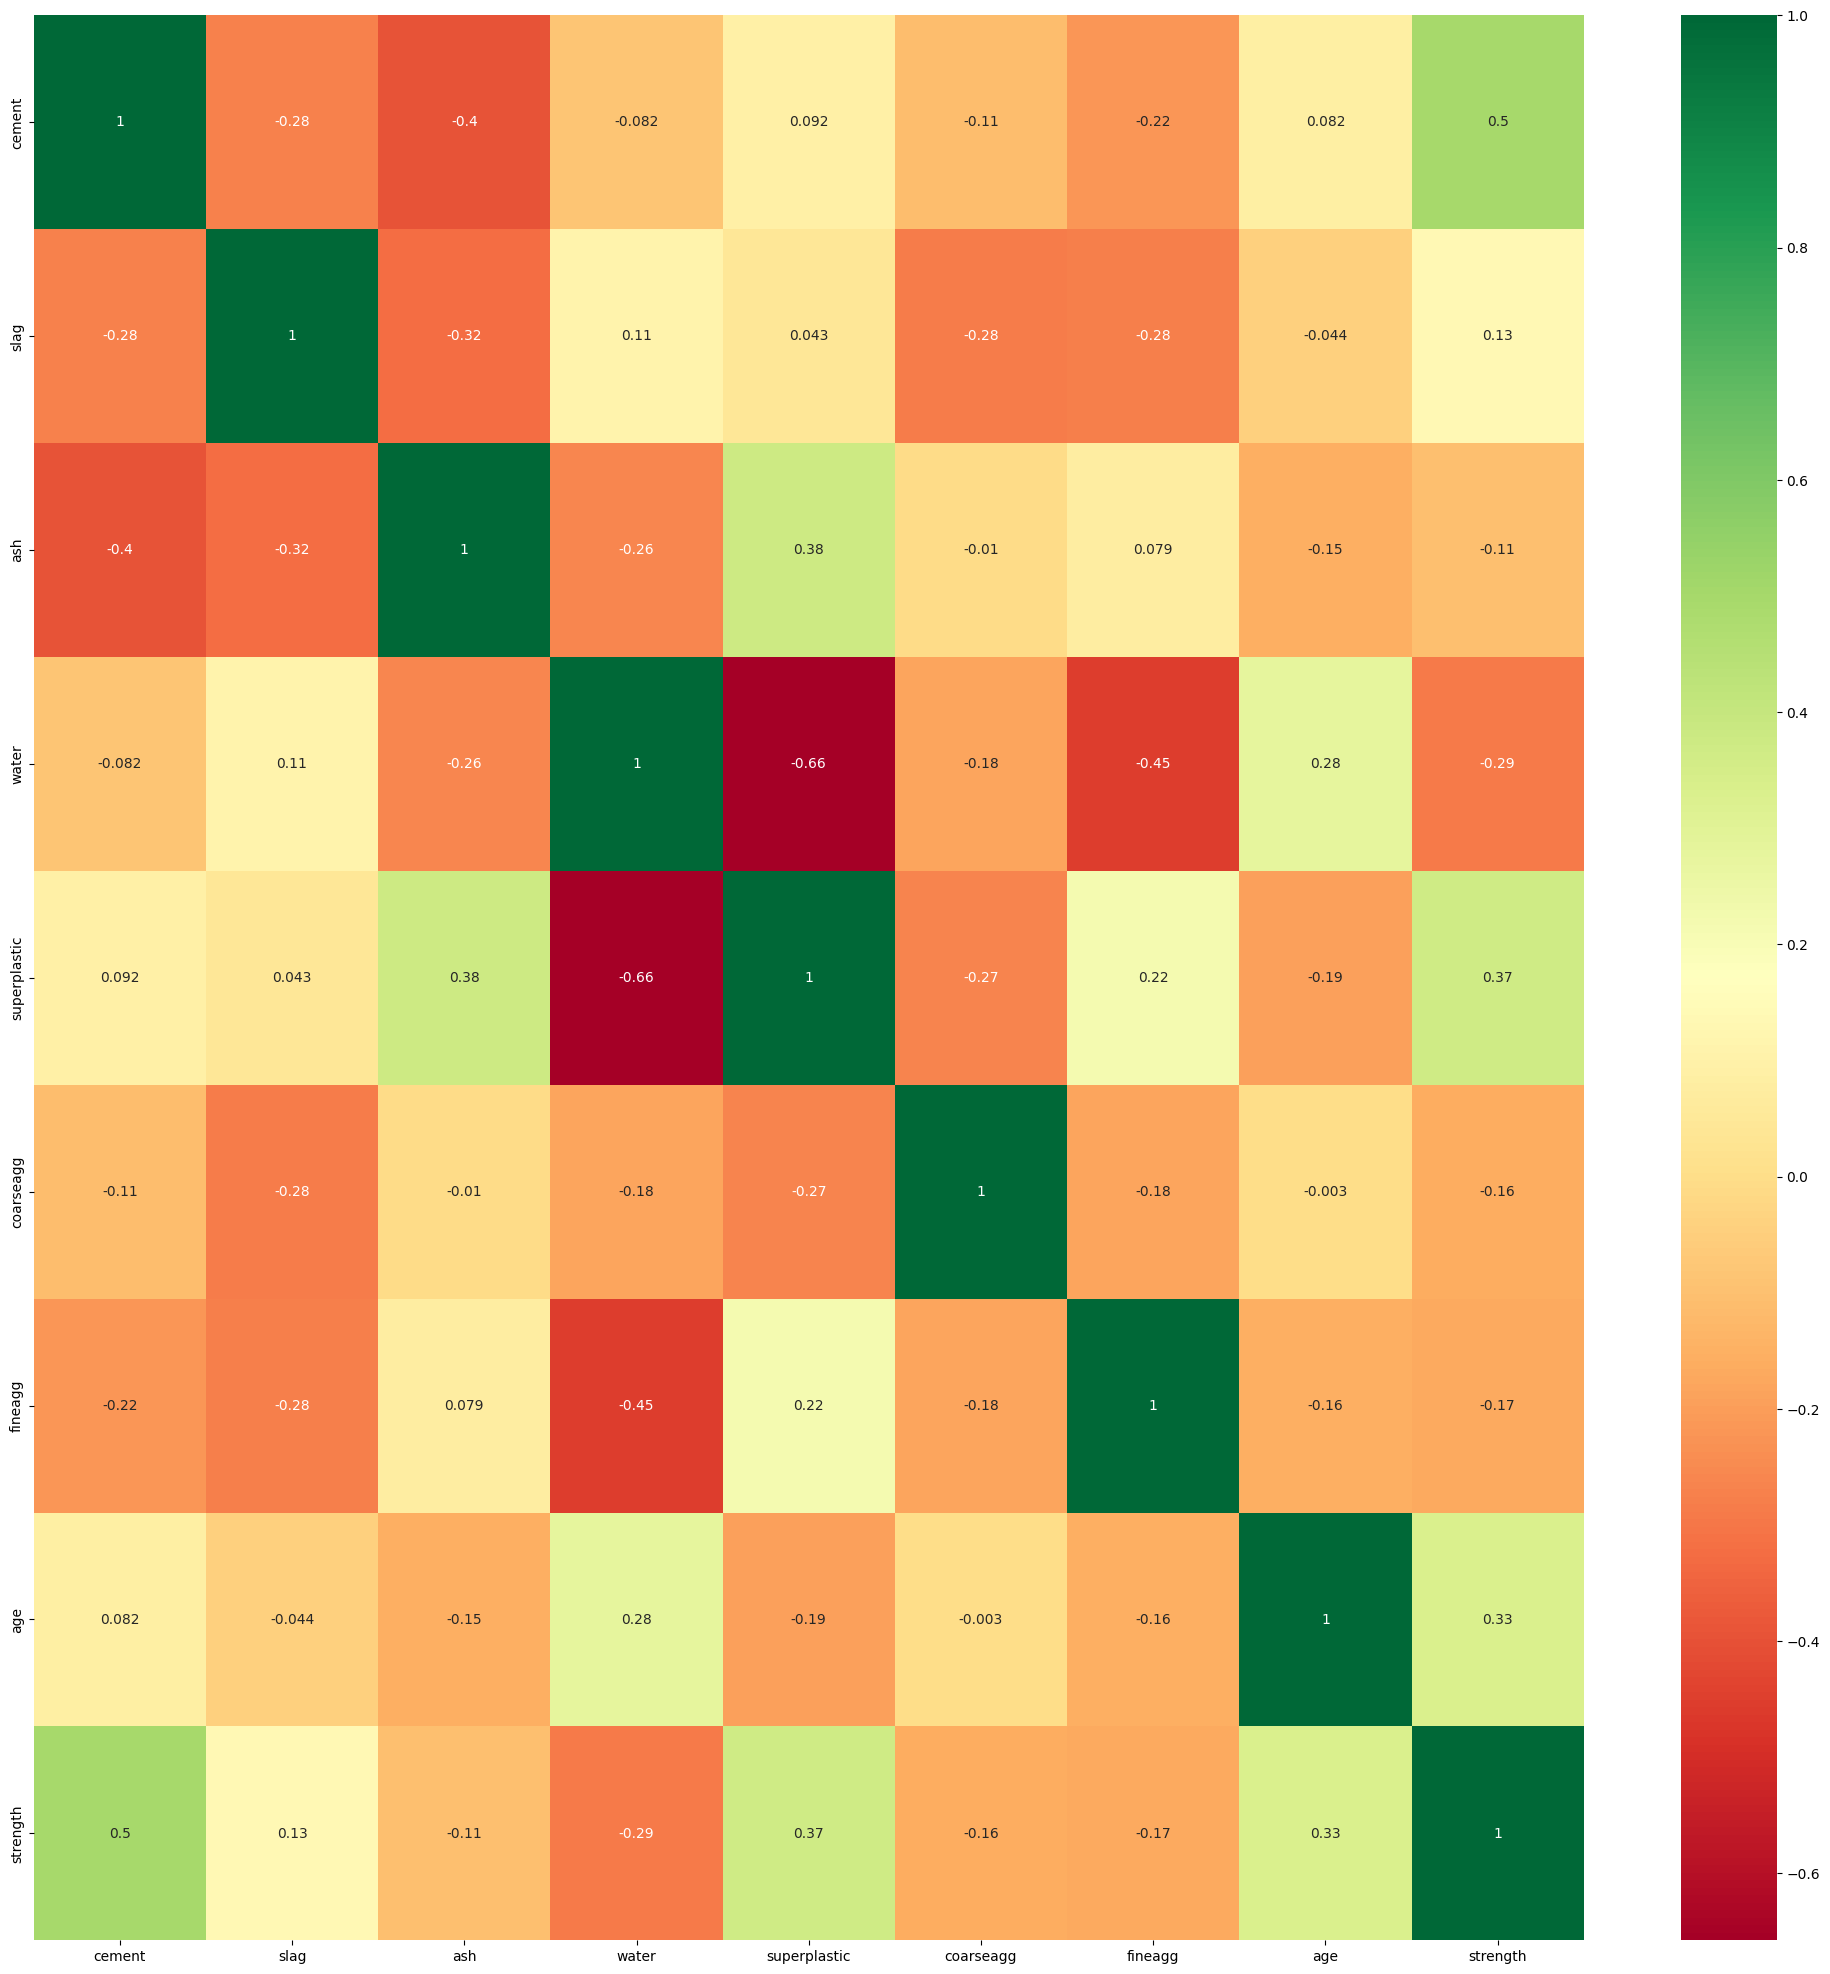

In [109]:
# Set up a large plotting canvas (25×25 inches) so that all cells and labels
# in the heatmap are easily readable.
plt.figure(figsize=(25, 25))

# Compute the pairwise correlation matrix of your DataFrame and plot it:
# - data.corr() calculates Pearson correlation coefficients between every pair of columns.
# - annot=True writes each correlation value into its corresponding cell.
# - cmap='RdYlGn' applies a diverging red→yellow→green palette,
#   where strong negative correlations are red, neutral are yellow, and strong positives are green.
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Display the completed heatmap in the output.
plt.show()


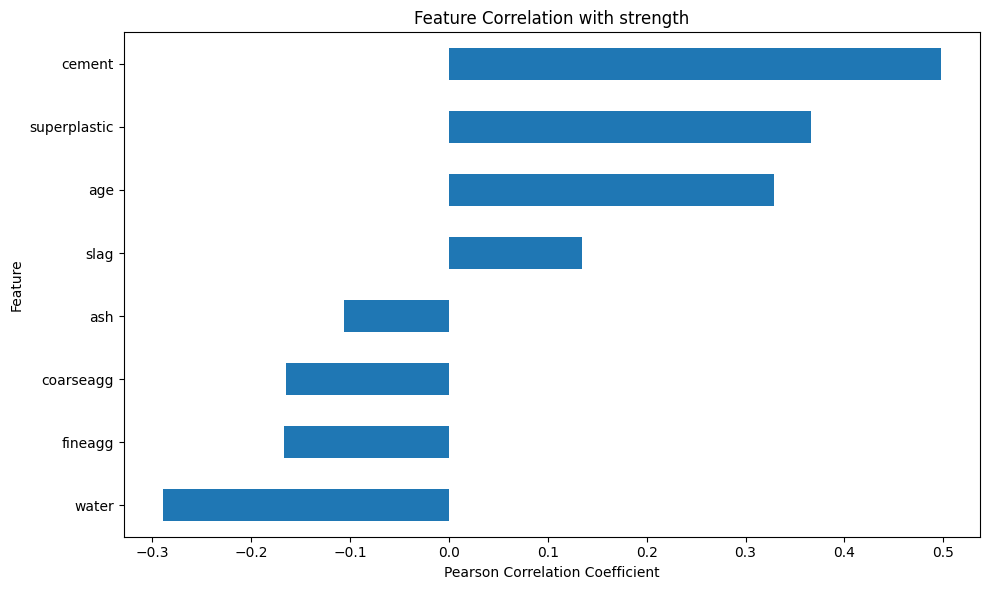

In [110]:
import matplotlib.pyplot as plt

# Identify the target column (assumed to be the last one in the DataFrame)
target_col = data.columns[-1]

# Compute Pearson correlations of every feature with the target variable,
# then drop the target’s self‑correlation and sort ascending for plotting
corr_with_target = (
    data.corr()[target_col]
    .drop(target_col)
    .sort_values()
)

# Create a horizontal bar chart to visualize which features
# are most positively or negatively correlated with compressive strength
plt.figure(figsize=(10, 6))                 # size in inches
corr_with_target.plot(kind='barh')           # horizontal bar plot
plt.title(f'Feature Correlation with {target_col}')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()                           # adjust margins
plt.show()


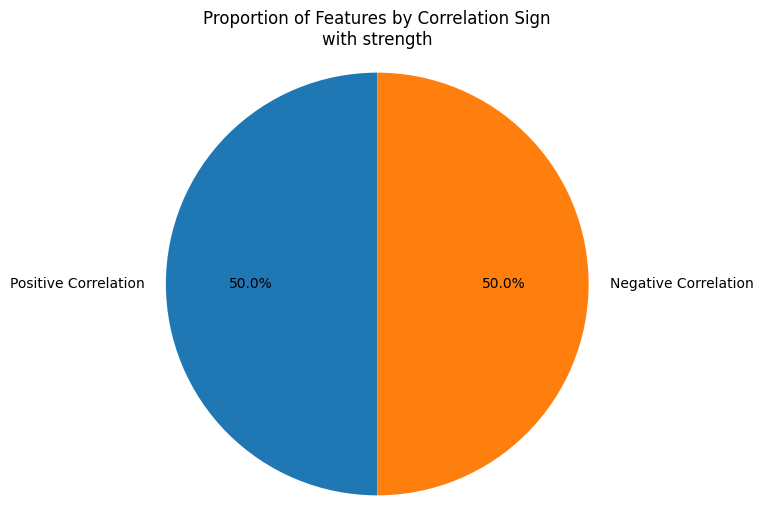

In [111]:
import matplotlib.pyplot as plt

# Compute correlations with the target variable (assumed last column)
target_col = data.columns[-1]
corr_with_target = data.corr()[target_col].drop(target_col)

# Count how many features are positively vs. negatively correlated
pos_count = (corr_with_target > 0).sum()
neg_count = (corr_with_target < 0).sum()

# Prepare labels and sizes for the pie chart
labels = ['Positive Correlation', 'Negative Correlation']
sizes = [pos_count, neg_count]

# Create the pie chart
plt.figure(figsize=(6, 6))           # square figure for a circular pie
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',               # show percentages with one decimal
    startangle=90                    # rotate start so first slice is at 12 o’clock
)
plt.title('Proportion of Features by Correlation Sign\nwith ' + target_col)
plt.axis('equal')                    # ensure pie is drawn as a circle
plt.show()


# OBSERVATIONS:
    
We observe a good positive correlation between csMPa and :
    1. Cement
    2. Age
    3. Superplasticizer
    
We also observe a good negetive correlation between csMPa and:
    1. Water

Superplasticizer and water have a very strong negetive correlation

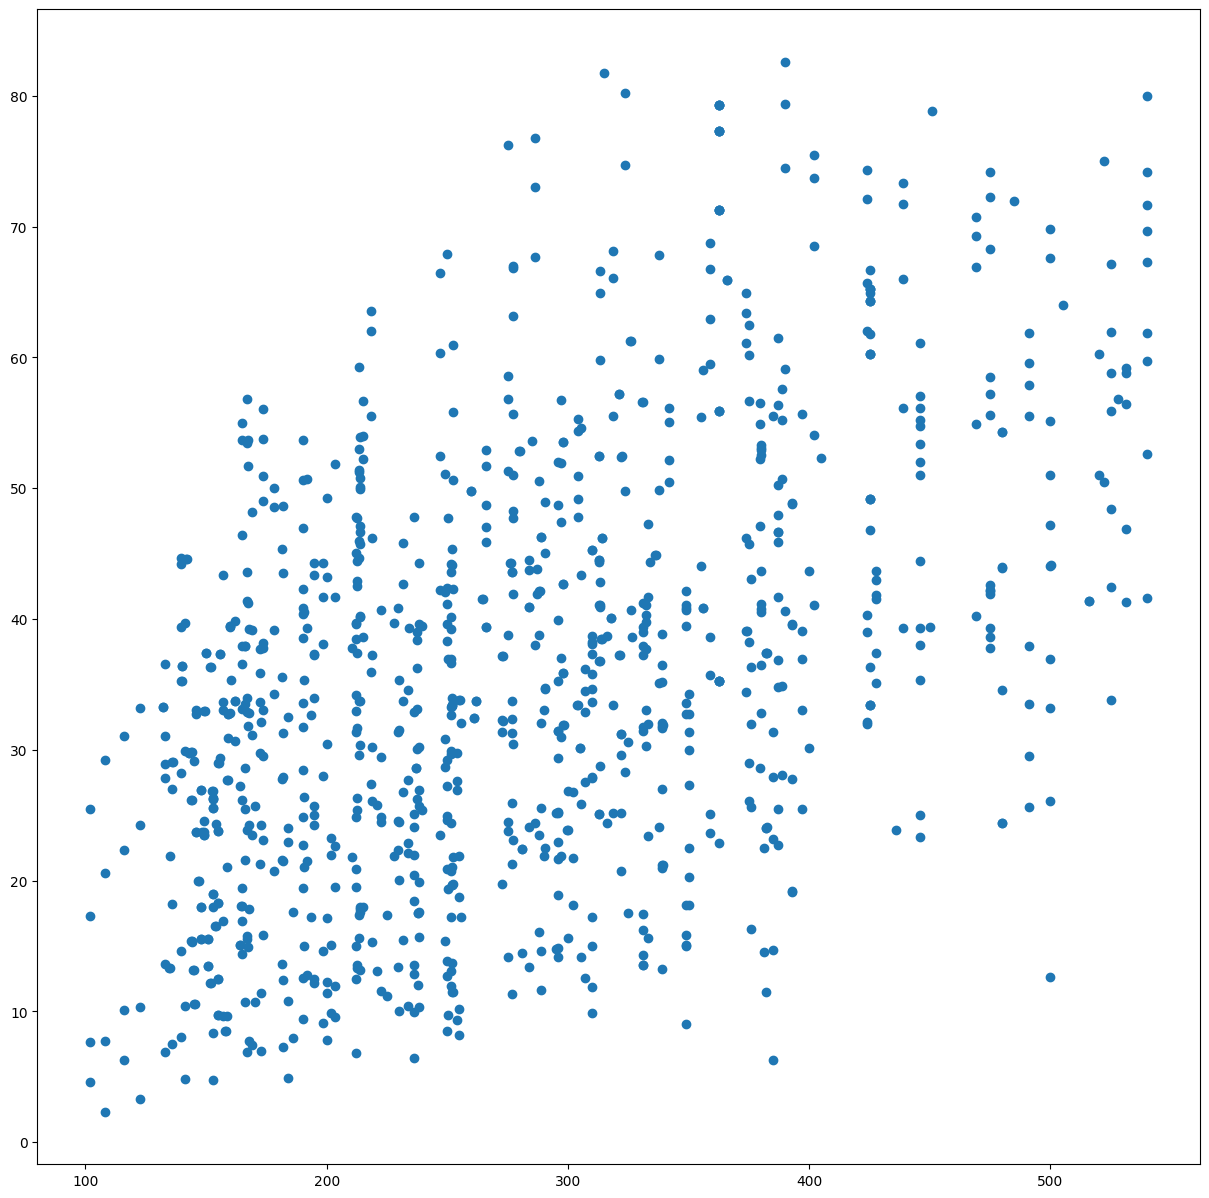

In [112]:
# Set up a large, square plotting area (15×15 inches) so that points and axes labels
# are clearly visible and not cramped.
plt.figure(figsize=(15, 15))

# Create a scatter plot showing the relationship between:
# - 'cement' (x-axis): amount of cement in the mix
# - 'csMPa' (y-axis): resulting compressive strength in MPa
# The `data` parameter tells matplotlib to pull these columns from the DataFrame.
plt.scatter(
    x='cement',
    y='strength',
    data=data
)

# Render the plot in the output cell.
plt.show()


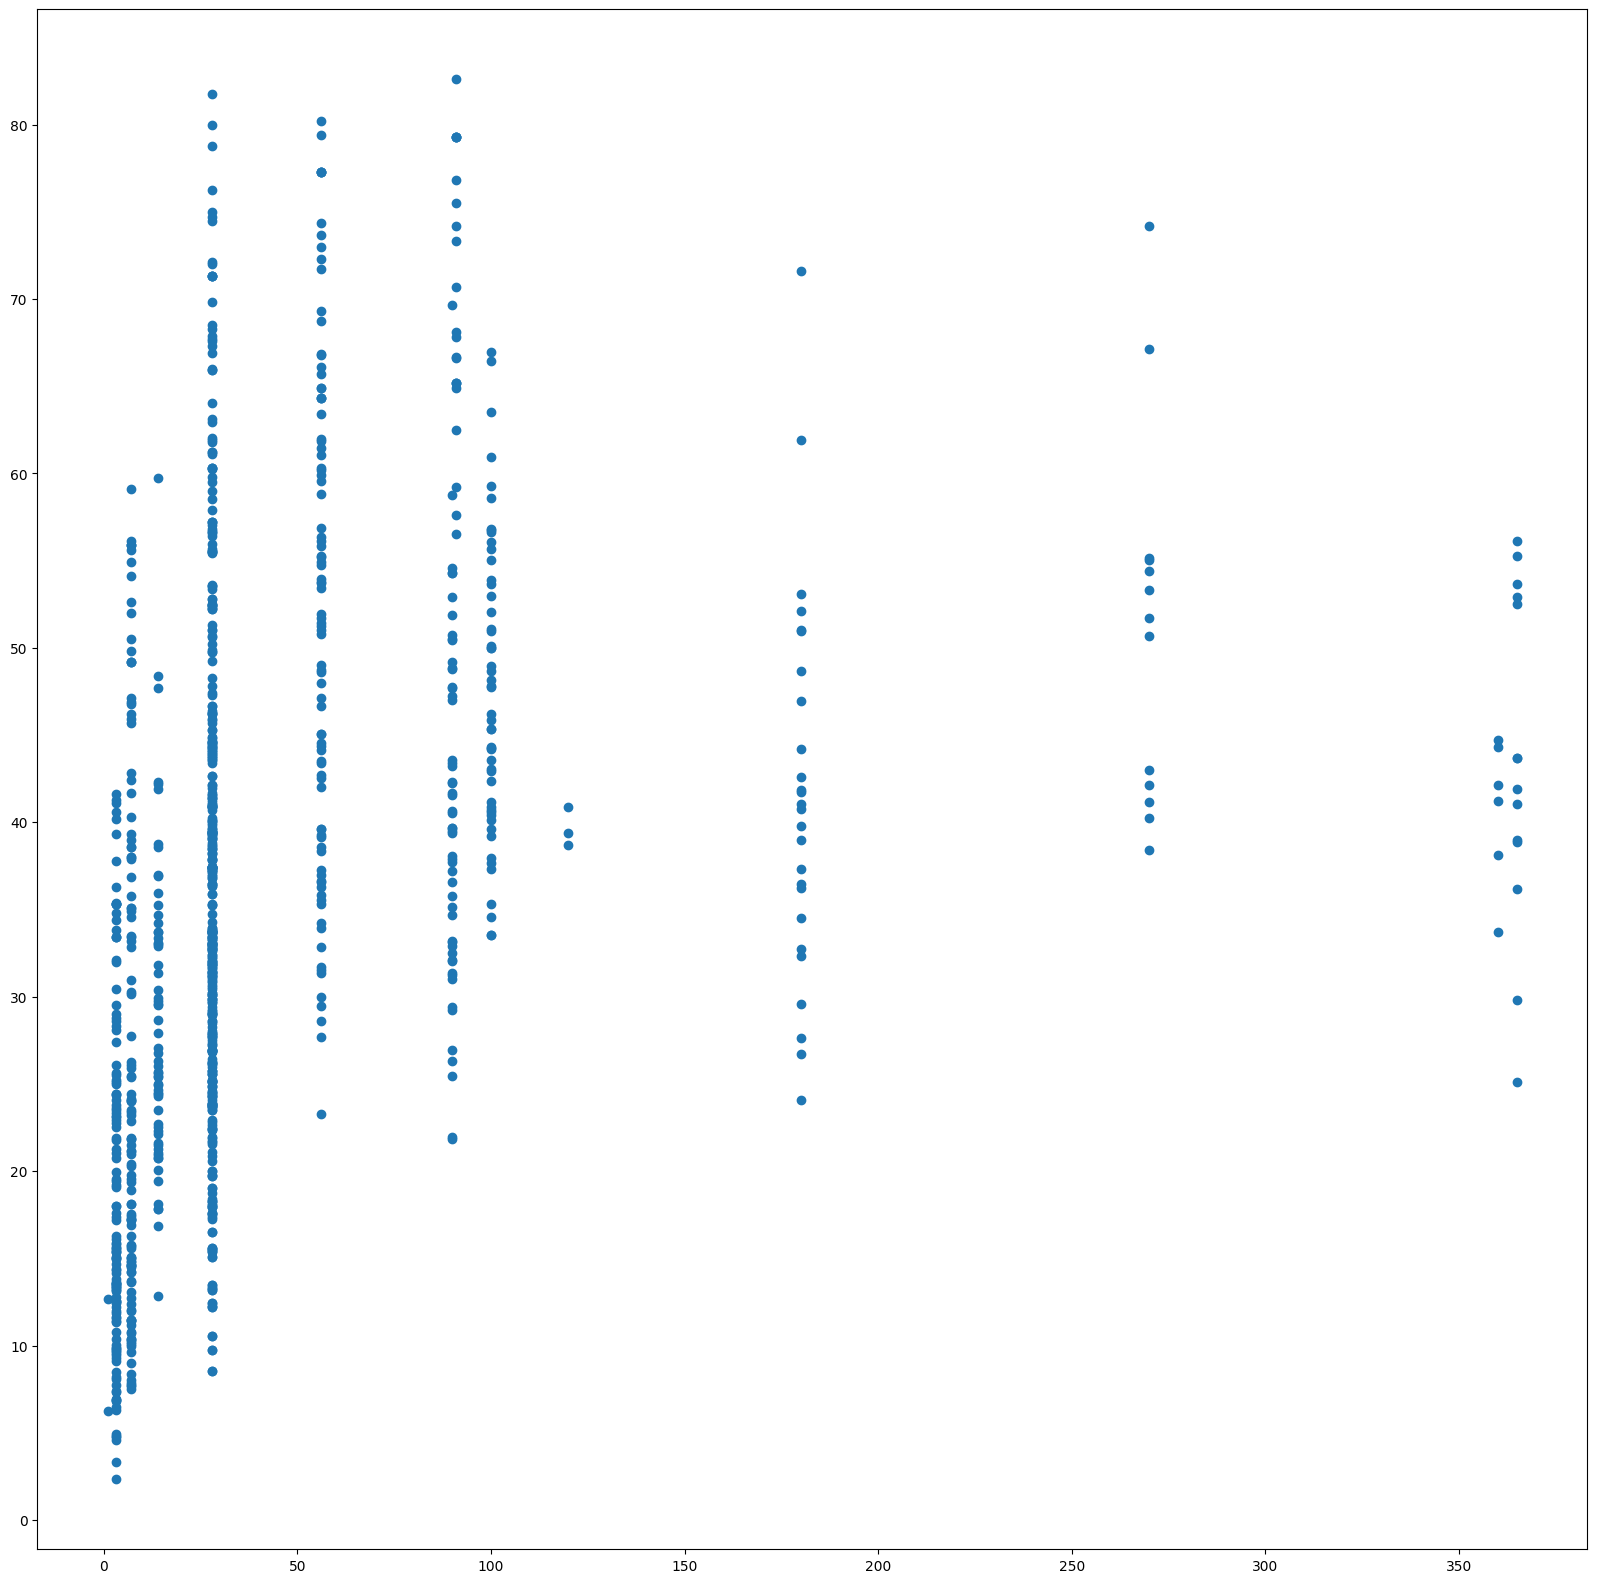

In [113]:
plt.figure(figsize = (20,20))
plt.scatter(x = 'age',
           y = 'strength',
           data = data)
plt.show()

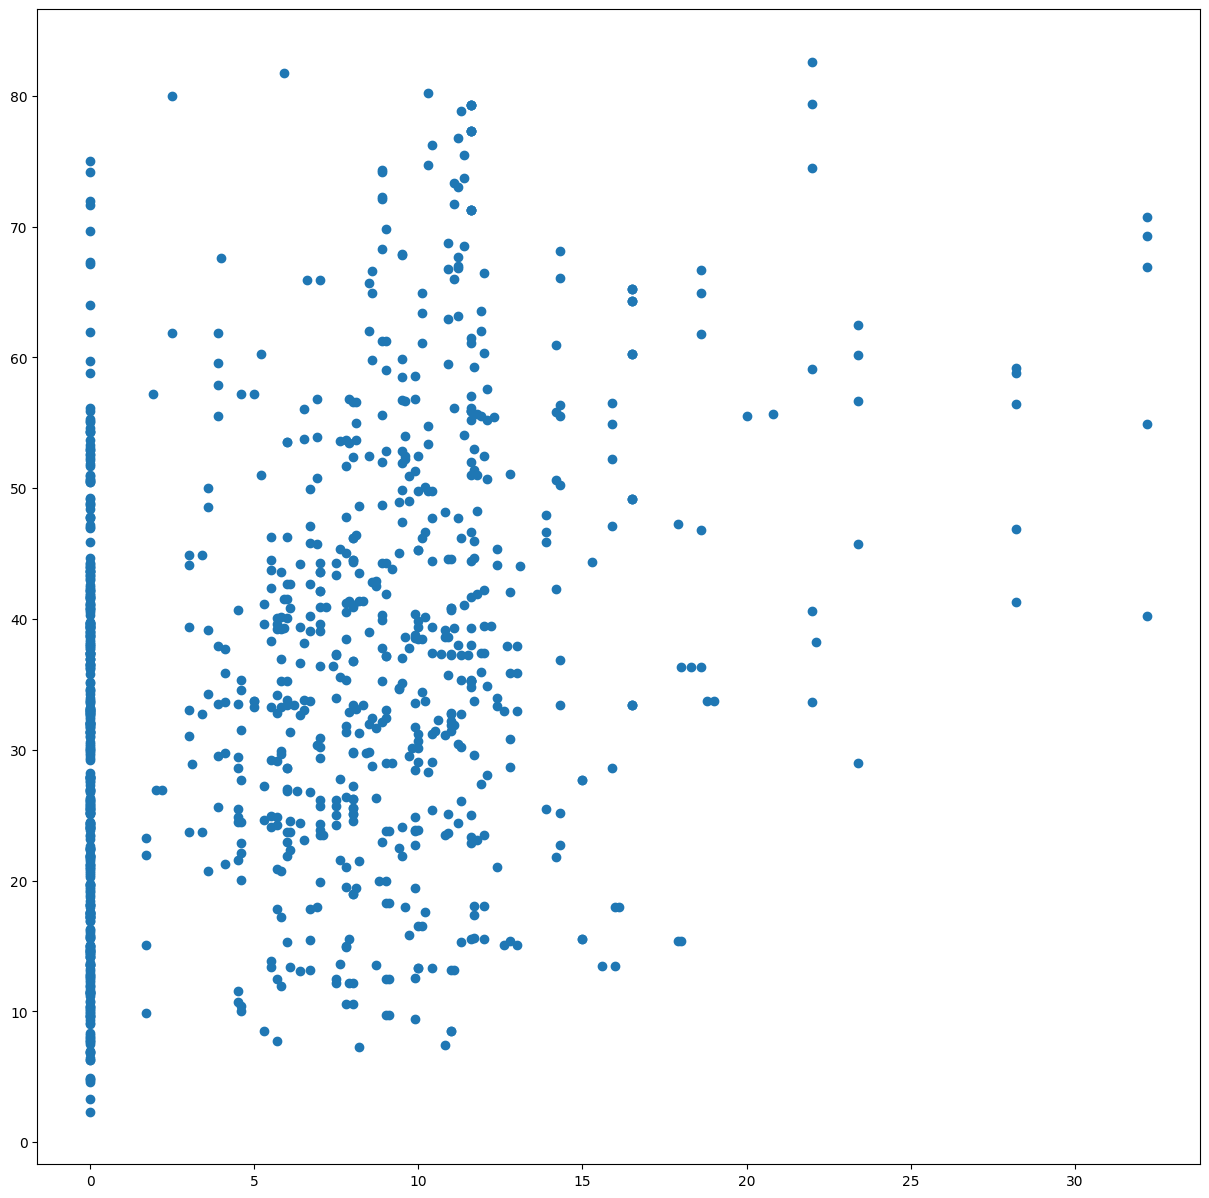

In [114]:
plt.figure(figsize=(15, 15))
plt.scatter(x='superplastic', y='strength', data=data)
plt.show()


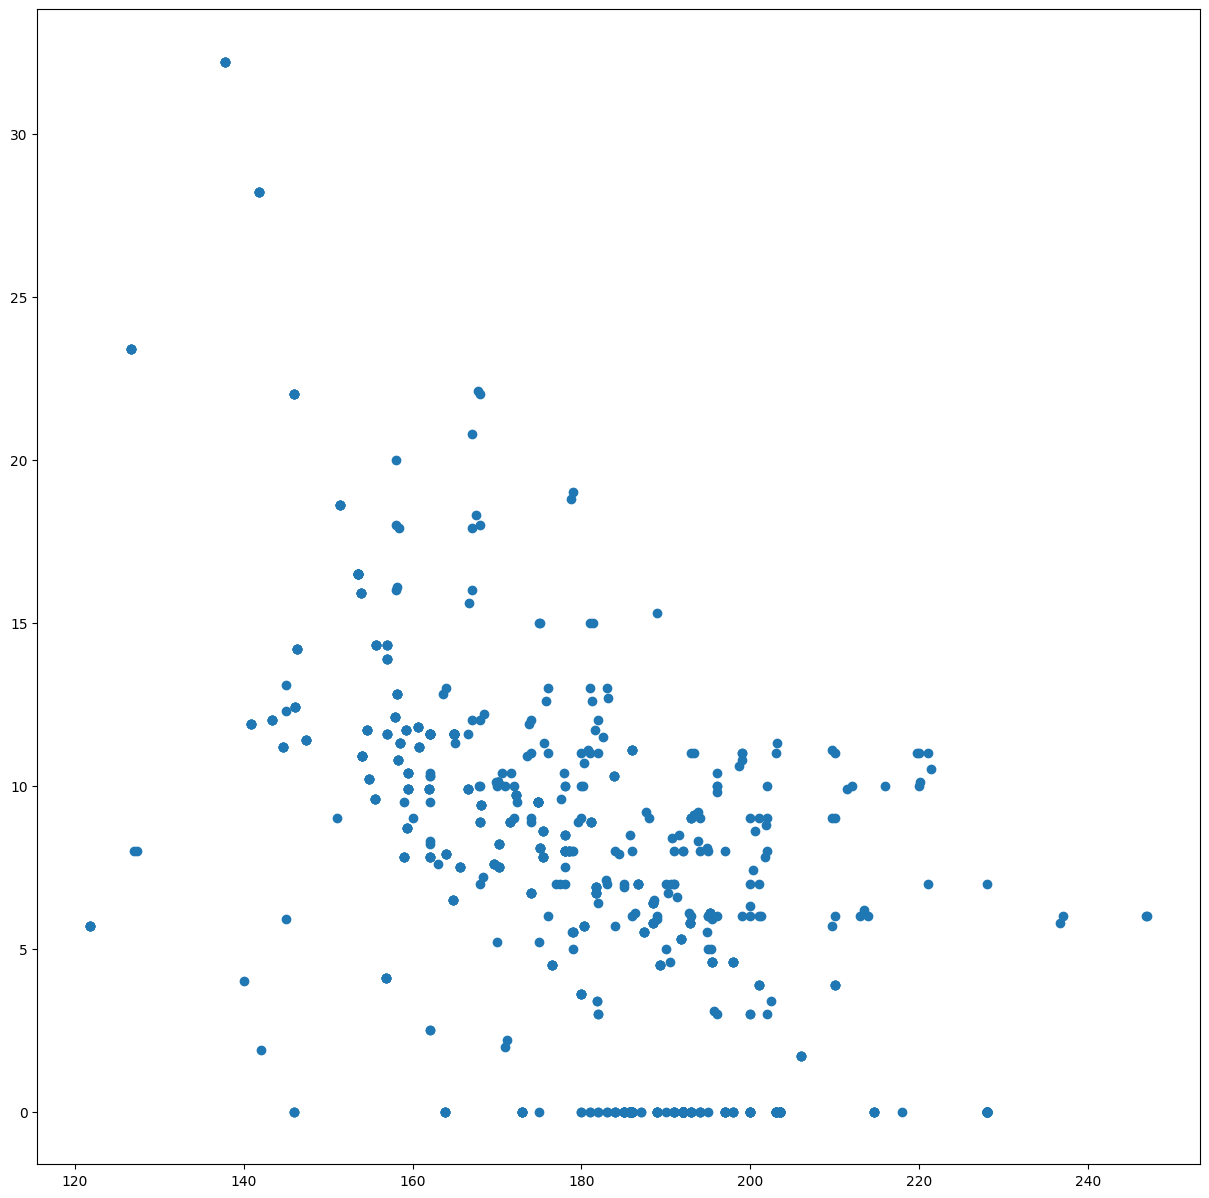

In [115]:
plt.figure(figsize = (15,15))
plt.scatter(x = 'water',
           y = 'superplastic',
           data = data)
plt.show()

The observations made have been shown above in the graphs above

In [116]:
# Get a list of all column names in the DataFrame
fields = list(data.keys())

# Loop over each column to compute a centered-and-scaled version
for field in fields:
    # Extract the column’s values (a pandas Series)
    values = data[field]

    # Compute the maximum value (for scaling denominator)
    maximum = max(values)

    # Compute the mean (for centering)
    avg = sum(values) / len(values)

    # Initialize a list to hold the scaled values for this column
    scaled_values = []

    # For each original value, apply (value – mean) ÷ max
    for value in values:
        scaled_values.append((value - avg) / maximum)

    # Convert the list to a NumPy array for performance
    scaled_array = np.array(scaled_values)

    # Add the scaled data back into the DataFrame as a new column
    data["Scaled_" + field] = scaled_array

# Preview the DataFrame to verify that the new columns have been added
data.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age,Scaled_strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,-0.259015,0.384263,-0.270806,0.088796,-0.192691,-0.000977,-0.025267,-0.048389,-0.071767
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,-0.207903,-0.088191,0.350383,-0.094200,0.142712,0.094219,0.022788,-0.086746,-0.149007
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,-0.057718,-0.205609,0.207455,0.023614,-0.021884,-0.013990,0.088273,-0.048389,-0.079878
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,-0.028089,0.111586,-0.270806,0.187987,-0.192691,-0.035737,-0.104353,-0.048389,0.121453
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,-0.234015,0.304686,-0.270806,0.047501,0.089917,0.065049,-0.077454,-0.048389,-0.212203


In [117]:
for field in fields:
    data.drop([field], axis = 1, inplace = True)

data.head()

,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age,Scaled_strength
0,-0.259015,0.384263,-0.270806,0.088796,-0.192691,-0.000977,-0.025267,-0.048389,-0.071767
1,-0.207903,-0.088191,0.350383,-0.094200,0.142712,0.094219,0.022788,-0.086746,-0.149007
2,-0.057718,-0.205609,0.207455,0.023614,-0.021884,-0.013990,0.088273,-0.048389,-0.079878
3,-0.028089,0.111586,-0.270806,0.187987,-0.192691,-0.035737,-0.104353,-0.048389,0.121453
4,-0.234015,0.304686,-0.270806,0.047501,0.089917,0.065049,-0.077454,-0.048389,-0.212203


In [118]:
y = data["Scaled_strength"]
data.drop(["Scaled_strength"], axis=1, inplace=True)
X = data

In [119]:
y.head()

0   -0.071767
1   -0.149007
2   -0.079878
3    0.121453
4   -0.212203
Name: Scaled_strength, dtype: float64

In [120]:
X.head()

,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age
0,-0.259015,0.384263,-0.270806,0.088796,-0.192691,-0.000977,-0.025267,-0.048389
1,-0.207903,-0.088191,0.350383,-0.094200,0.142712,0.094219,0.022788,-0.086746
2,-0.057718,-0.205609,0.207455,0.023614,-0.021884,-0.013990,0.088273,-0.048389
3,-0.028089,0.111586,-0.270806,0.187987,-0.192691,-0.035737,-0.104353,-0.048389
4,-0.234015,0.304686,-0.270806,0.047501,0.089917,0.065049,-0.077454,-0.048389


# Train Test Splitting

In [121]:
# Import the function to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Split features (X) and target (y) into training and testing sets:
# - test_size=0.3 reserves 30% of the data for testing, 70% for training
# - random_state=20 ensures the split is reproducible across runs
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=20
)


In [122]:
# Print the shape of the training features array:
# - First value = number of training samples
# - Second value = number of features (predictor variables)
print(X_train.shape)

# Print the shape of the training target array/vector:
# - Only one value (number of training samples), since y is 1‑dimensional
print(y_train.shape)


(721, 8)
(721,)


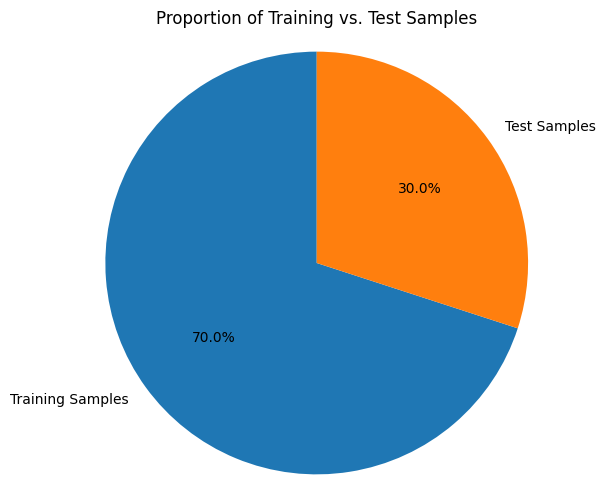

In [123]:
import matplotlib.pyplot as plt

# Determine the number of samples in the training and test sets
train_count = X_train.shape[0]
test_count = X_test.shape[0]

# Prepare labels and sizes for the pie chart
labels = ['Training Samples', 'Test Samples']
sizes = [train_count, test_count]

# Create a square figure so the pie will be circular
plt.figure(figsize=(6, 6))

# Draw the pie chart:
# - autopct='%1.1f%%' shows each slice’s percentage
# - startangle=90 rotates the first slice to the top (12 o’clock)
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

# Add a title to describe what the chart represents
plt.title('Proportion of Training vs. Test Samples')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


# Linear Regression Model

In [124]:
# Import the LinearRegression estimator from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model with default settings
model = LinearRegression()

# Fit (train) the model on your training data:
# - X_train: feature matrix for the training set
# - y_train: target values corresponding to X_train
model.fit(X_train, y_train)


LinearRegression()

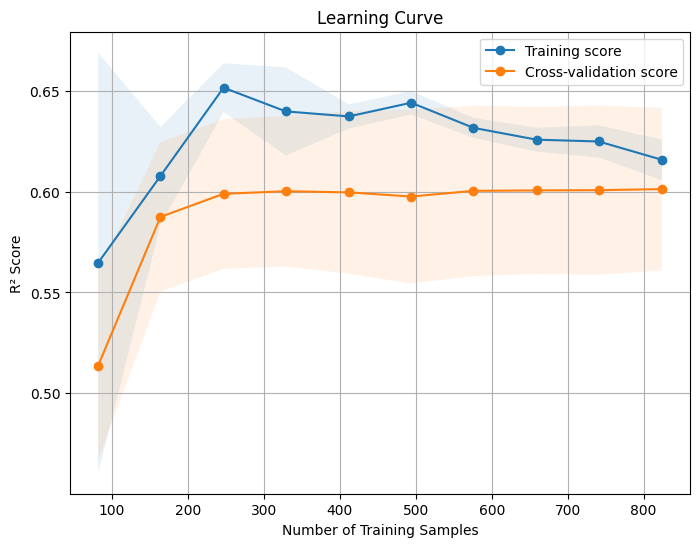

In [125]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 1. Define your estimator/model (here we use linear regression as an example)
model = LinearRegression()

# 2. Use learning_curve to compute training and cross-validation scores
#    - X, y: your full feature matrix and target vector
#    - train_sizes: fractions of the training data to use for generating the curve
#    - cv: number of folds for cross‑validation
#    - scoring: metric to evaluate (here we use R² score)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1      # use all available CPU cores
)

# 3. Compute the mean and standard deviation across folds for both sets
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# 4. Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.1)  # shade for one std dev

plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')
plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 alpha=0.1)

# 5. Customize the plot
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid(True)

# 6. Show the plot
plt.show()


In [126]:
from sklearn.linear_model import LinearRegression

# 1) Instantiate
model = LinearRegression()

# 2) Fit on training data
model.fit(X_train, y_train)

# 3) Now you can predict on test data
y_predict = model.predict(X_test)


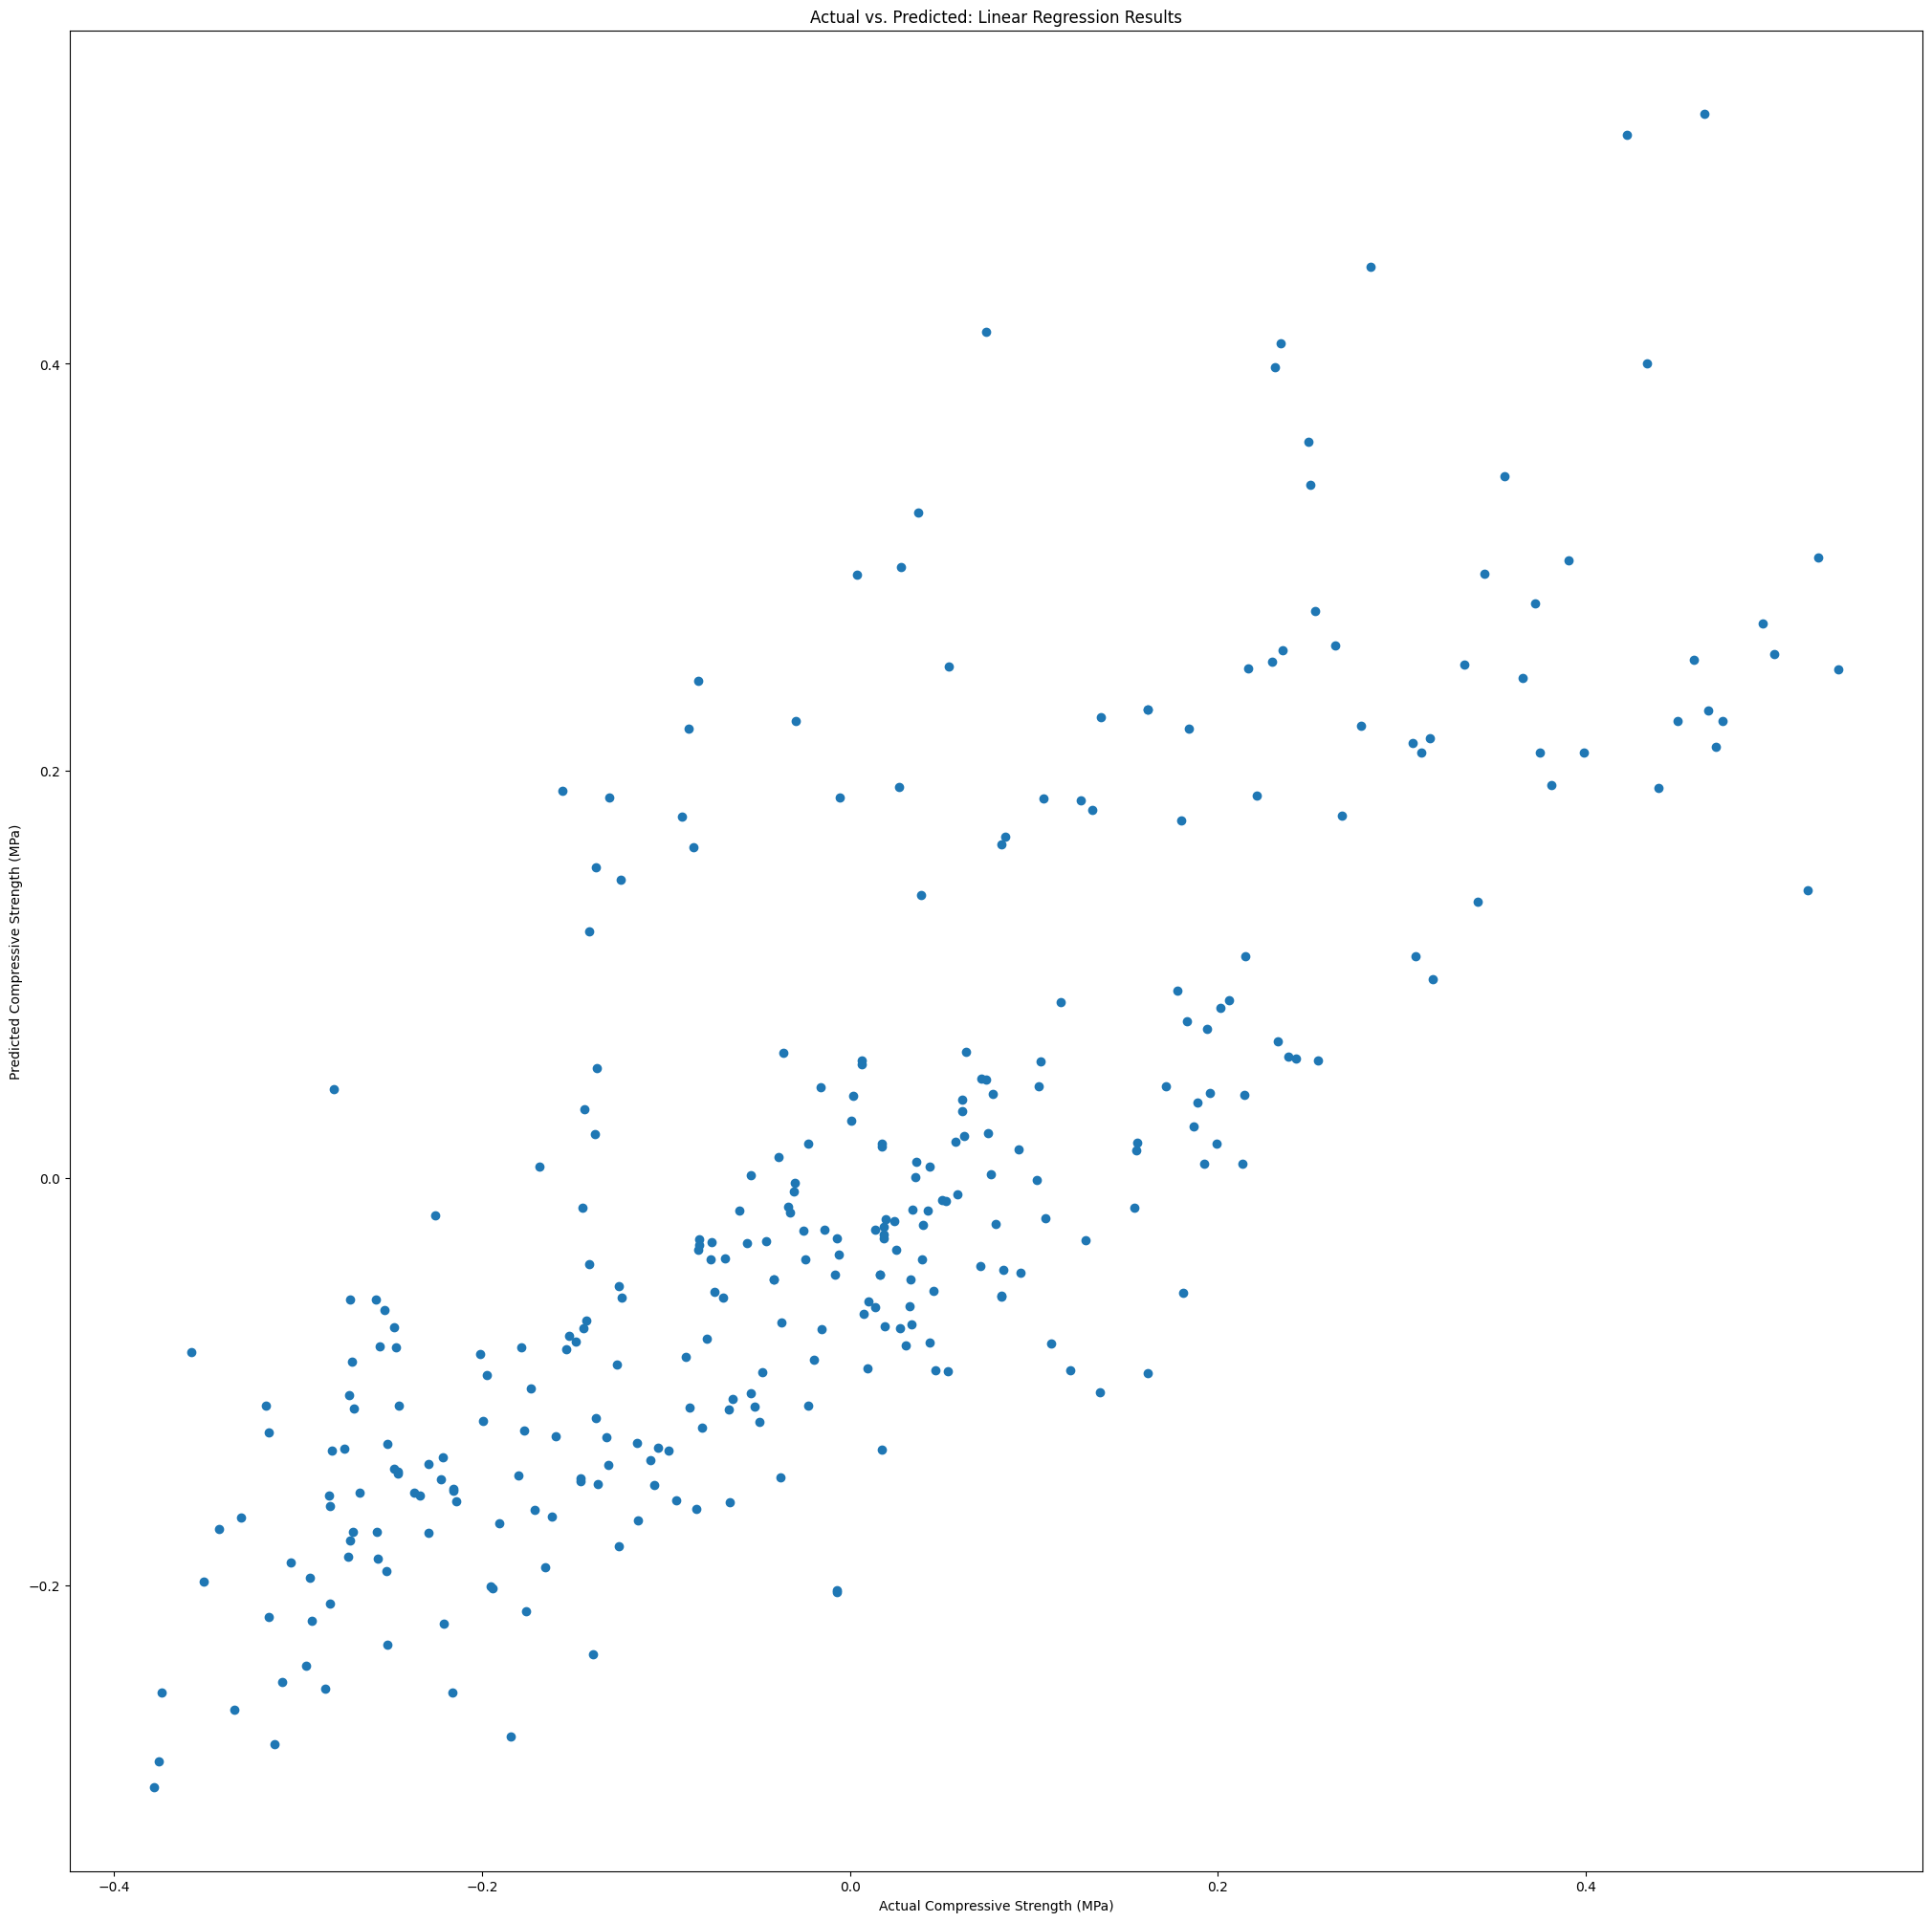

In [127]:
# Create a large square plotting area (25×25 inches) for maximum readability
plt.figure(figsize=(25, 25))

# Convert the true and predicted values into plain Python lists
# (matplotlib will accept pandas Series too, but this makes it explicit)
Y_test = [i for i in y_test]
Y_predict = [j for j in y_predict]

# Draw a scatter plot of actual vs. predicted values:
# - x-axis: true compressive strength (y_test)
# - y-axis: model’s predicted strength (y_predict)
plt.scatter(Y_test, Y_predict)

# Optionally, plot a 45° reference line to see perfect predictions
# plt.plot(Y_test, Y_test, 'r--', label='Perfect prediction')

# Add labels and a title for clarity
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted: Linear Regression Results')
# plt.legend()

# Display the plot
plt.show()


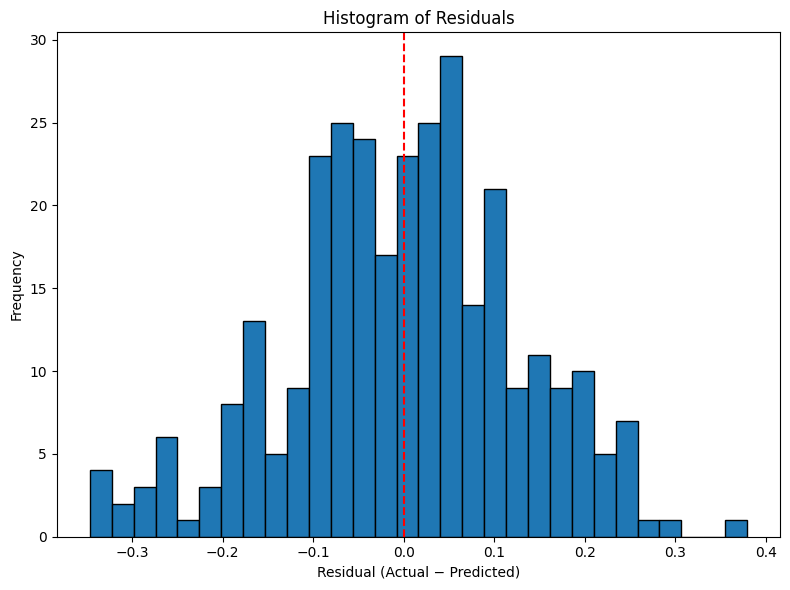

In [128]:
# Import matplotlib’s plotting interface
import matplotlib.pyplot as plt

# Compute residuals: the difference between the true values and the model’s predictions
residuals = y_test - y_predict

# Start a new figure with a defined size (8×6 inches)
plt.figure(figsize=(8, 6))

# Plot a histogram of the residuals:
# - bins=30: split the data into 30 equally spaced bars
# - edgecolor='k': draw a black border around each bar for visual clarity
plt.hist(residuals, bins=30, edgecolor='k')

# Draw a vertical dashed line at zero residual to mark where predictions are perfect
plt.axvline(0, color='r', linestyle='--')

# Label the x-axis to explain what is being plotted
plt.xlabel('Residual (Actual − Predicted)')

# Label the y-axis to show we’re counting frequencies of residual values
plt.ylabel('Frequency')

# Add a descriptive title
plt.title('Histogram of Residuals')

# Automatically adjust subplot parameters so labels/titles fit nicely
plt.tight_layout()

# Display the histogram
plt.show()


# TEST DATA

In [129]:
data_test = pd.read_csv("concrete.csv")

In [130]:
data_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [131]:
data_test.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [132]:
# Get the list of all column names (fields) in the DataFrame `data_test`
fields = list(data_test.keys())

# Initialize empty lists to hold values and scaled values
values = []
scaled_values = []

# Loop through each column (field) in the dataset
for field in fields:
    # Extract the values of the current field (column)
    values = data_test[field]

    # Calculate the maximum value in the column
    maximum = max(values)

    # Calculate the average (mean) value in the column
    avg = sum(values) / len(values)

    # Loop over each value in the column to compute scaled values
    for value in values:
        # Scale each value by subtracting the average and dividing by the maximum
        scaled_values += [(value - avg) / maximum]

    # Convert the scaled_values list into a NumPy array
    scaled_values = np.array(scaled_values)

    # Add a new column to the DataFrame with the scaled values
    data_test["Scaled_" + field] = scaled_values

    # Reset scaled_values list for the next field
    scaled_values = []

# Display the first few rows of the updated DataFrame, including the new scaled columns
data_test.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age,Scaled_strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,-0.259015,0.384263,-0.270806,0.088796,-0.192691,-0.000977,-0.025267,-0.048389,-0.071767
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,-0.207903,-0.088191,0.350383,-0.094200,0.142712,0.094219,0.022788,-0.086746,-0.149007
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,-0.057718,-0.205609,0.207455,0.023614,-0.021884,-0.013990,0.088273,-0.048389,-0.079878
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,-0.028089,0.111586,-0.270806,0.187987,-0.192691,-0.035737,-0.104353,-0.048389,0.121453
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,-0.234015,0.304686,-0.270806,0.047501,0.089917,0.065049,-0.077454,-0.048389,-0.212203


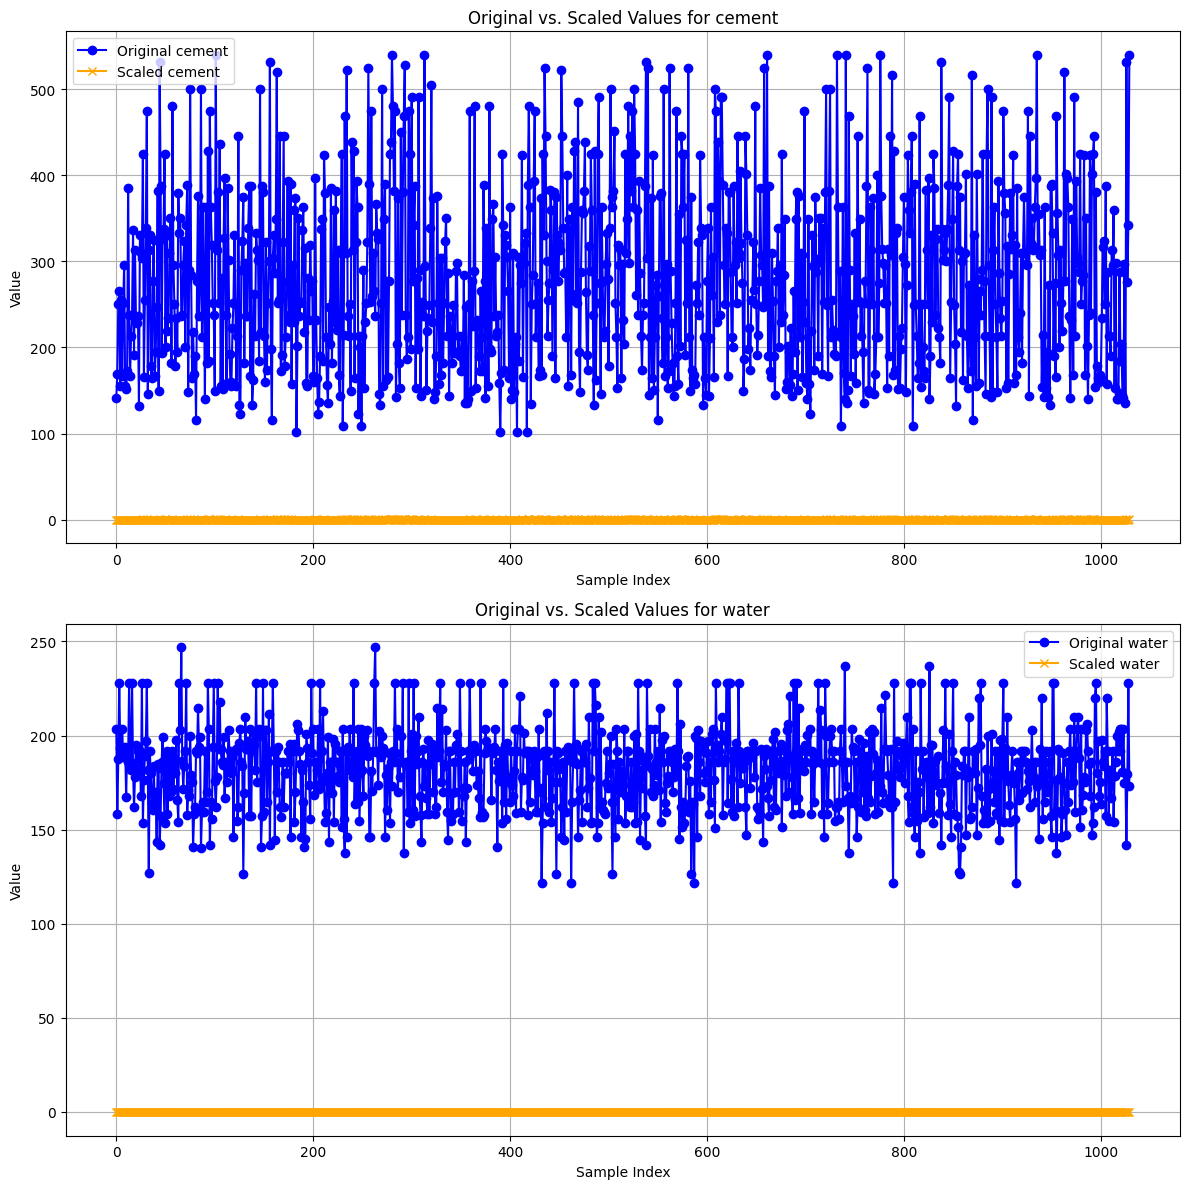

In [133]:
import matplotlib.pyplot as plt

# Select a few example fields (columns) to visualize
example_fields = ['cement', 'water']  # adjust as needed

# Set up a plot with subplots for each field
plt.figure(figsize=(12, 6 * len(example_fields)))

for idx, field in enumerate(example_fields):
    # Get original and scaled values
    original_values = data_test[field].values
    scaled_values = data_test['Scaled_' + field].values

    # Create a subplot for each field
    plt.subplot(len(example_fields), 1, idx + 1)

    # Plot original values (blue line)
    plt.plot(original_values, label=f'Original {field}', color='blue', marker='o')

    # Plot scaled values (orange line)
    plt.plot(scaled_values, label=f'Scaled {field}', color='orange', marker='x')

    # Add title and legend
    plt.title(f'Original vs. Scaled Values for {field}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [134]:
# Loop through each field (column name) in the list 'fields'
for field in fields:
    # Drop (delete) the column from the DataFrame 'data_test'
    # axis=1 → means we are dropping a column (not a row)
    # inplace=True → apply the change directly to 'data_test' without creating a copy
    data_test.drop([field], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame (after dropping the original columns)
data_test.head()


,Scaled_cement,Scaled_slag,Scaled_ash,Scaled_water,Scaled_superplastic,Scaled_coarseagg,Scaled_fineagg,Scaled_age,Scaled_strength
0,-0.259015,0.384263,-0.270806,0.088796,-0.192691,-0.000977,-0.025267,-0.048389,-0.071767
1,-0.207903,-0.088191,0.350383,-0.094200,0.142712,0.094219,0.022788,-0.086746,-0.149007
2,-0.057718,-0.205609,0.207455,0.023614,-0.021884,-0.013990,0.088273,-0.048389,-0.079878
3,-0.028089,0.111586,-0.270806,0.187987,-0.192691,-0.035737,-0.104353,-0.048389,0.121453
4,-0.234015,0.304686,-0.270806,0.047501,0.089917,0.065049,-0.077454,-0.048389,-0.212203


In [135]:
Y = data_test["Scaled_strength"]
data_test.drop(["Scaled_strength"], axis = 1, inplace = True)

In [136]:
y_predict = model.predict(data_test)

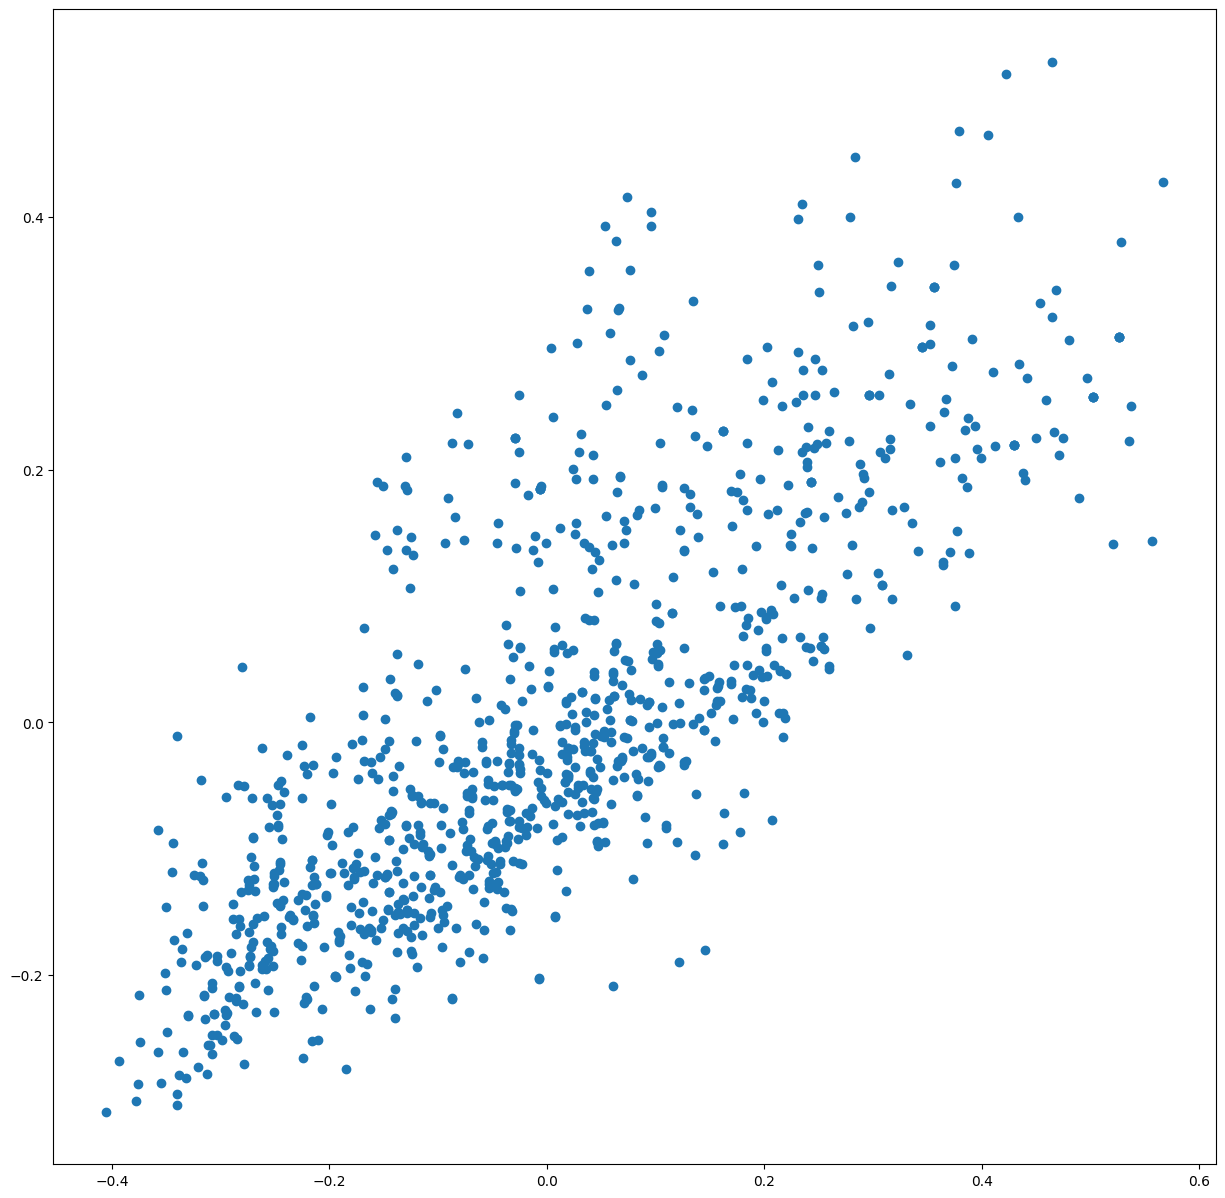

In [137]:
plt.figure(figsize=(15,15))
plt.scatter(Y, y_predict)
plt.show()

# Saving model in disk

In [138]:
import pickle
filename = "Concrete_strength_Lr_Model"
pickle.dump(model, open(filename,"wb"))